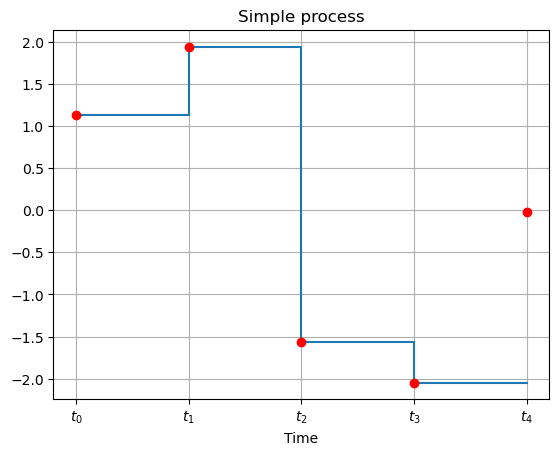

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define time labels and numerical positions
time_labels = [r'$t_0$', r'$t_1$', r'$t_2$', r'$t_3$', r'$t_4$']
time_numeric = np.arange(len(time_labels))

# Simulate values for the piecewise constant process
values = np.random.normal(loc=0.0, scale=1.0, size=len(time_numeric))

# Prepare data for step plot (piecewise constant)
piecewise_times = []
piecewise_values = []

for i in range(len(time_numeric) - 1):
    piecewise_times += [time_numeric[i], time_numeric[i+1]]
    piecewise_values += [values[i], values[i]]

# Plotting
plt.step(piecewise_times, piecewise_values, where='post', label='Piecewise Constant Process')
plt.scatter(time_numeric, values, color='red', zorder=5, label='Jump Points')
plt.xticks(time_numeric, time_labels)
plt.title("Simple process")
plt.xlabel("Time")
#plt.ylabel("Value")
#plt.legend()
plt.grid(True)
plt.savefig('../images/simpleProcess.png')
plt.show()

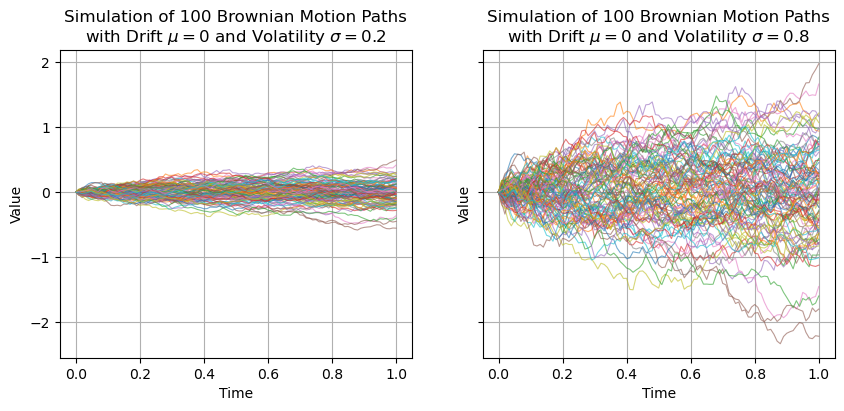

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 0          # Drift
sigma = 0.2       # Volatility
T = 1.0           # Time horizon
N = 100           # Number of time steps
M = 100           # Number of paths

dt = T / N        # Time step size
t = np.linspace(0, T, N+1)  # Time grid

# Simulate Brownian motion paths
# Standard normal increments
dW = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=(M, N))
W = np.cumsum(dW, axis=1)
W = np.hstack((np.zeros((M, 1)), W))  # Add W_0 = 0

# Add drift
X = mu * t + sigma * W
X2 = mu * t + 4*sigma * W

# Plot a subset of the paths (or all, but it may get cluttered)
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
for i in range(M):
    axes[0].plot(t, X[i], lw=0.8, alpha=0.6)
    axes[1].plot(t, X2[i], lw=0.8, alpha=0.6)

axes[0].set_title(f"Simulation of {M} Brownian Motion Paths\nwith Drift $\\mu={mu}$ and Volatility $\\sigma={sigma}$")
axes[1].set_title(f"Simulation of {M} Brownian Motion Paths\nwith Drift $\\mu={mu}$ and Volatility $\\sigma={4*sigma}$")
for ax in axes:
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")
    ax.grid(True)
plt.savefig('../images/brownianmu0.png')
plt.show()

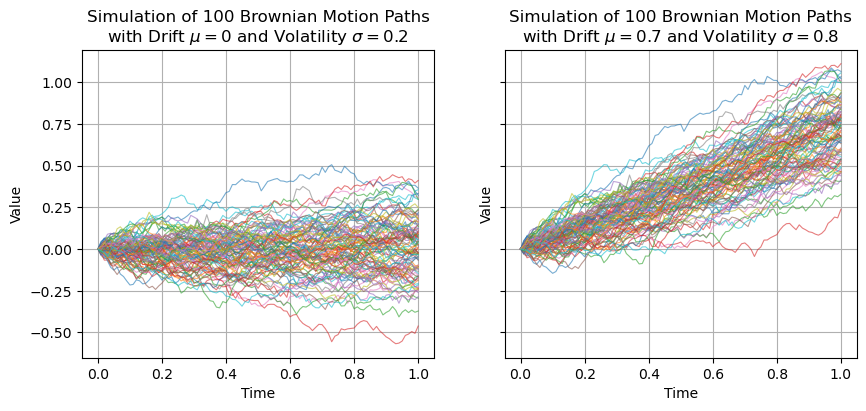

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = .7          # Drift
sigma = 0.2       # Volatility
T = 1.0           # Time horizon
N = 100           # Number of time steps
M = 100           # Number of paths

dt = T / N        # Time step size
t = np.linspace(0, T, N+1)  # Time grid

# Simulate Brownian motion paths
# Standard normal increments
dW = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=(M, N))
W = np.cumsum(dW, axis=1)
W = np.hstack((np.zeros((M, 1)), W))  # Add W_0 = 0

# Add drift
X = sigma * W
X2 = mu * t + sigma * W

# Plot a subset of the paths (or all, but it may get cluttered)
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
for i in range(M):
    axes[0].plot(t, X[i], lw=0.8, alpha=0.6)
    axes[1].plot(t, X2[i], lw=0.8, alpha=0.6)

axes[0].set_title(f"Simulation of {M} Brownian Motion Paths\nwith Drift $\\mu={0}$ and Volatility $\\sigma={sigma}$")
axes[1].set_title(f"Simulation of {M} Brownian Motion Paths\nwith Drift $\\mu={mu}$ and Volatility $\\sigma={4*sigma}$")
for ax in axes:
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")
    ax.grid(True)
plt.savefig('../images/brownianmunon0.png')
plt.show()

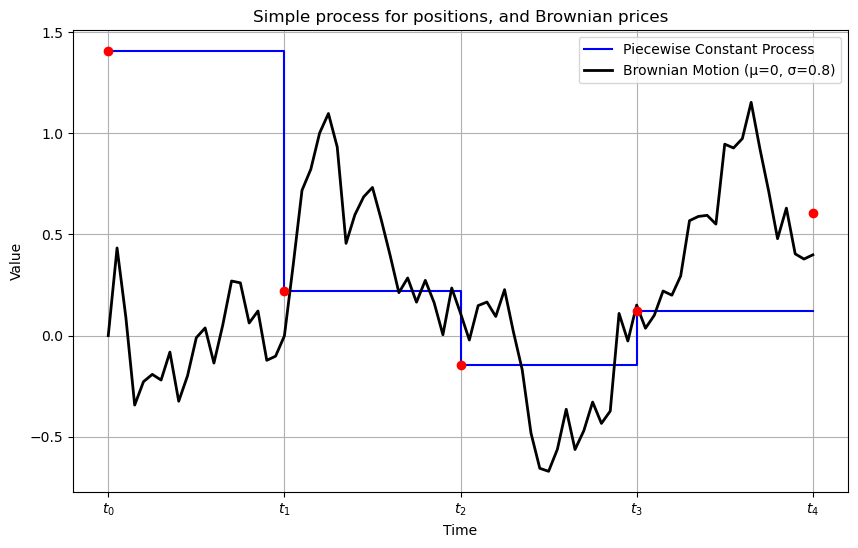

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(39)

# --- Time setup ---
n_intervals = 4              # From t_0 to t_4
points_per_interval = 20     # Finer resolution between each t_j and t_{j+1}
N_fine = n_intervals * points_per_interval
T = 4                        # Final time corresponding to t_4
dt = T / N_fine
t_fine = np.linspace(0, T, N_fine + 1)

# Coarse time points and labels
t_coarse = np.linspace(0, T, n_intervals + 1)
time_labels = [rf'$t_{j}$' for j in range(len(t_coarse))]

# --- Piecewise constant process ---
values_piecewise = np.random.normal(loc=0.0, scale=1.0, size=len(t_coarse))

piecewise_times = []
piecewise_values = []

for i in range(len(t_coarse) - 1):
    piecewise_times += [t_coarse[i], t_coarse[i+1]]
    piecewise_values += [values_piecewise[i], values_piecewise[i]]

# --- Brownian motion with μ = 0 ---
sigma = 0.8
dW = np.random.normal(loc=0.0, scale=np.sqrt(dt) * sigma, size=N_fine)
W = np.insert(np.cumsum(dW), 0, 0.0)  # W_0 = 0

# --- Plot ---
plt.figure(figsize=(10, 6))

# Piecewise constant process
plt.step(piecewise_times, piecewise_values, where='post', label='Piecewise Constant Process', color='blue')
plt.scatter(t_coarse, values_piecewise, color='red', zorder=5)

# Brownian motion
plt.plot(t_fine, W, color='black', linewidth=2, label='Brownian Motion (μ=0, σ=0.8)')

# Formatting
plt.xticks(t_coarse, time_labels)
plt.title("Simple process for positions, and Brownian prices")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.savefig('../images/simpleProcess2.png')
plt.show()

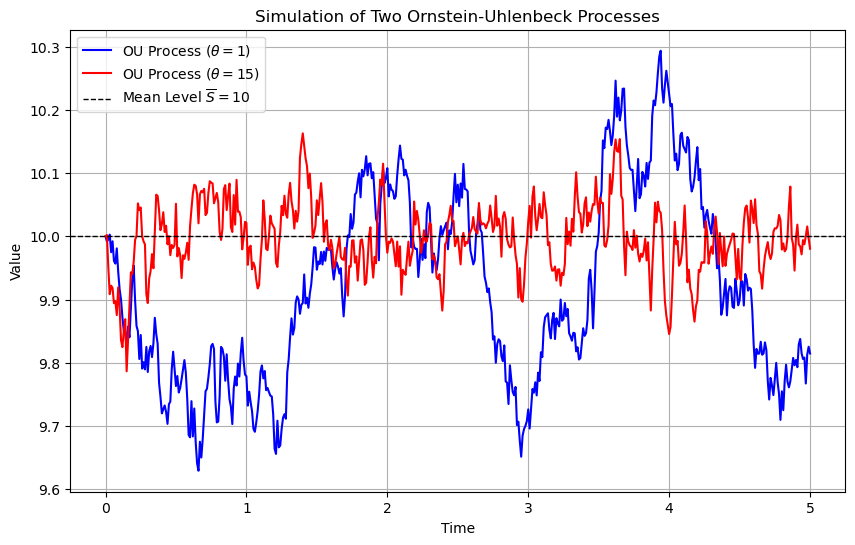

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(41)

# --- Parameters ---
theta_1 = 1      # Mean reversion speed for first process (slow)
theta_2 = 15      # Mean reversion speed for second process (fast)
mu = 10.0          # Long-term mean level
sigma = 0.3        # Volatility
X0 = 10           # Initial value
T = 5.0            # Total time
N = 500            # Number of steps
dt = T / N         # Time step
t = np.linspace(0, T, N+1)

# --- Simulate two OU processes ---
def simulate_ou(theta, mu, sigma, X0, dt, N):
    X = np.zeros(N+1)
    X[0] = X0
    for i in range(N):
        dW = np.random.normal(loc=0.0, scale=np.sqrt(dt))
        X[i+1] = X[i] + theta * (mu - X[i]) * dt + sigma * dW
    return X

X_theta1 = simulate_ou(theta_1, mu, sigma, X0, dt, N)
X_theta2 = simulate_ou(theta_2, mu, sigma, X0, dt, N)

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(t, X_theta1, label=rf'OU Process ($\theta={theta_1}$)', color='blue')
plt.plot(t, X_theta2, label=rf'OU Process ($\theta={theta_2}$)', color='red')
plt.axhline(mu, color='black', linestyle='--', linewidth=1, label='Mean Level $\overline{S}=10$')
plt.title("Simulation of Two Ornstein-Uhlenbeck Processes")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.savefig('../images/OU1.png')
plt.show()


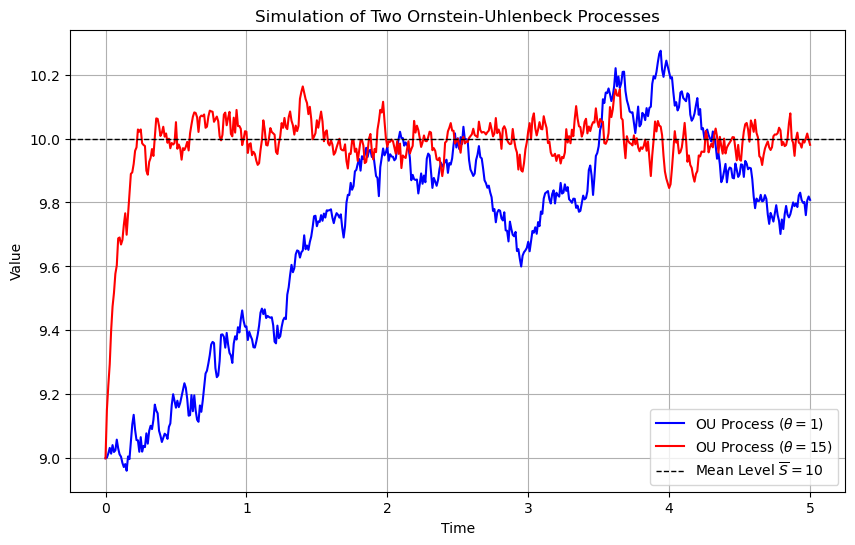

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(41)

# --- Parameters ---
theta_1 = 1      # Mean reversion speed for first process (slow)
theta_2 = 15      # Mean reversion speed for second process (fast)
mu = 10.0          # Long-term mean level
sigma = 0.3        # Volatility
X0 = 9           # Initial value
T = 5.0            # Total time
N = 500            # Number of steps
dt = T / N         # Time step
t = np.linspace(0, T, N+1)

# --- Simulate two OU processes ---
def simulate_ou(theta, mu, sigma, X0, dt, N):
    X = np.zeros(N+1)
    X[0] = X0
    for i in range(N):
        dW = np.random.normal(loc=0.0, scale=np.sqrt(dt))
        X[i+1] = X[i] + theta * (mu - X[i]) * dt + sigma * dW
    return X

X_theta1 = simulate_ou(theta_1, mu, sigma, X0, dt, N)
X_theta2 = simulate_ou(theta_2, mu, sigma, X0, dt, N)

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(t, X_theta1, label=rf'OU Process ($\theta={theta_1}$)', color='blue')
plt.plot(t, X_theta2, label=rf'OU Process ($\theta={theta_2}$)', color='red')
plt.axhline(mu, color='black', linestyle='--', linewidth=1, label='Mean Level $\overline{S}=10$')
plt.title("Simulation of Two Ornstein-Uhlenbeck Processes")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.savefig('../images/OU2.png')
plt.show()


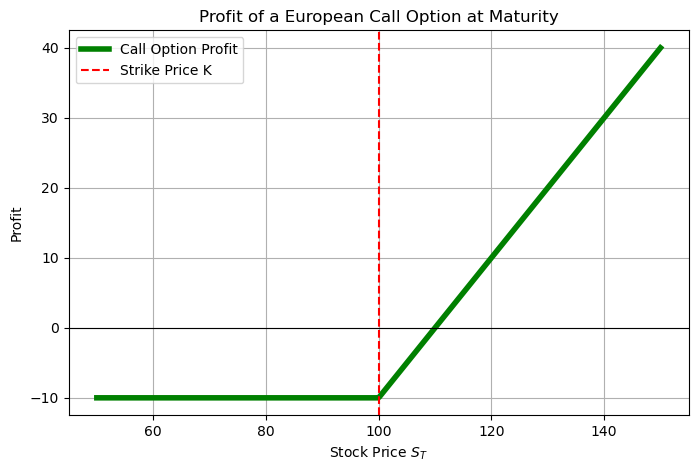

In [6]:
# Profit of a Call Option (Payoff minus Premium)


import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 100    # Strike price
premium = 10  # Premium paid for the option
S = np.linspace(50, 150, 500)  # Range of stock prices at maturity

# Payoff and Profit
payoff = np.maximum(S - K, 0)
profit = payoff - premium

# Plot
plt.figure(figsize=(8,5))
plt.plot(S, profit, label='Call Option Profit', color='green', lw=4)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(K, color='red', linestyle='--', label='Strike Price K')
plt.title('Profit of a European Call Option at Maturity')
plt.xlabel('Stock Price $S_T$')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.savefig('../images/call.png')
plt.show()

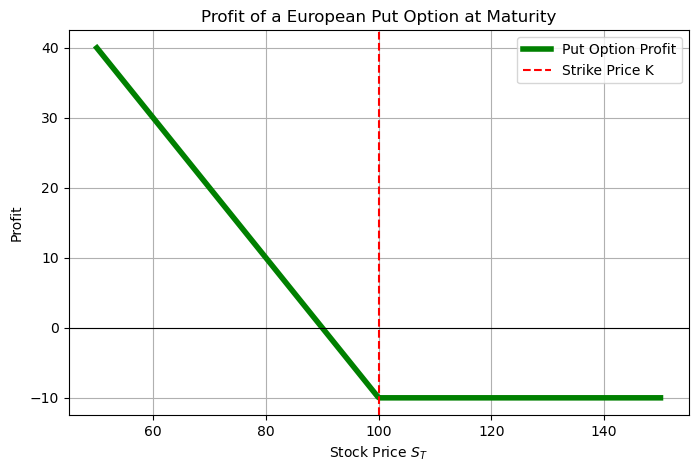

In [7]:
# Profit of a Call Option (Payoff minus Premium)


import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 100    # Strike price
premium = 10  # Premium paid for the option
S = np.linspace(50, 150, 500)  # Range of stock prices at maturity

# Payoff and Profit
payoff = np.maximum(K - S, 0)
profit = payoff - premium

# Plot
plt.figure(figsize=(8,5))
plt.plot(S, profit, label='Put Option Profit', color='green', lw=4)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(K, color='red', linestyle='--', label='Strike Price K')
plt.title('Profit of a European Put Option at Maturity')
plt.xlabel('Stock Price $S_T$')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.savefig('../images/put.png')
plt.show()

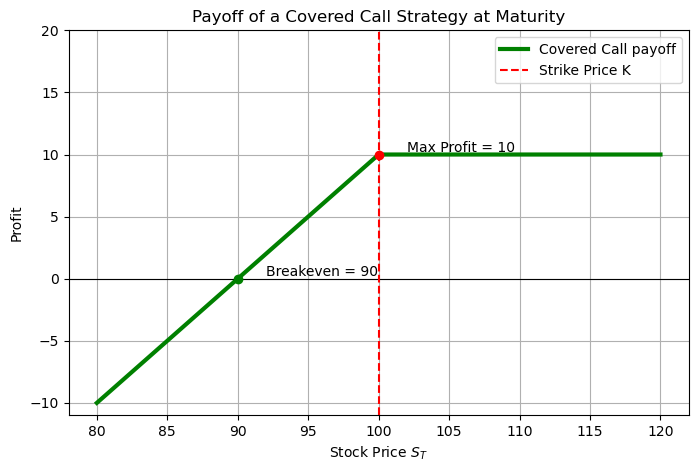

In [23]:
# Profit of a Covered Call Strategy


import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 100      # Strike price
premium = 10 # Premium received from selling the call
S = np.linspace(80, 120, 500)  # Range of stock prices at maturity

S0 = 100

# Covered Call Profit: long stock + short call
profit = (S - S0) - np.maximum(S - K, 0) + premium

# Plot
plt.figure(figsize=(8,5))
plt.plot(S, profit, label='Covered Call payoff', color='g', lw=3)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(K, color='red', linestyle='--', label='Strike Price K')

# Highlight maximum profit
max_profit = (K - S0) + premium
plt.plot(K, max_profit, 'ro')
plt.text(K+2, max_profit, f'Max Profit = {max_profit}', verticalalignment='bottom')

# Highlight breakeven point
breakeven = S0 - premium
plt.plot(breakeven, 0, 'go')
plt.text(breakeven+2, 0, f'Breakeven = {breakeven}', verticalalignment='bottom')

# Labels and title
plt.title('Payoff of a Covered Call Strategy at Maturity')
plt.xlabel('Stock Price $S_T$')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.ylim(None, 20)
plt.savefig('../images/coveredcall.png')
plt.show()
